<a href="https://colab.research.google.com/github/Selinski15/WBS-project-1-eniac-magist-group1-Silvia/blob/main/Kopie_von_Copy_of_3_7_category_creation_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Searching for the category

For this code along we are only going to use the products DataFrame, however, if you believe there is information in other tables that can help to create categories, please, feel free to explore.

In [ ]:
import pandas as pd

In [ ]:
# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

In [ ]:
product_category_df = products_cl.copy()

In [ ]:
product_category_df.head()

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364


## 1.&nbsp; Category creation by search term
Let's start by creating a column `category`. For now we'll fill this column with a blank string `""`.

In [ ]:
product_category_df["category"] = ""
product_category_df.head()

,sku,name,desc,price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,


We can find all the products with certain words in their `description` using `.loc[]` and `.str.contains()`. Here we'll look at all the items that have the word `keyboard` in their description.

In [ ]:
#product_category_df.loc[product_category_df.desc.str.lower().str.contains("keyboard"), :]
product_category_df.loc[product_category_df.name.str.lower().str.contains("apple"), :]

,sku,name,desc,price,in_stock,type,category
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,
5,APP0073,Apple Composite AV Cable iPhone and iPod white,IPhone and iPod AV Cable Dock to Composite Video.,45.00,0,1230,
9,APP0100,Apple Adapter Mini Display Port to VGA,Adapter Mini Display Port to VGA MacBook and M...,35.00,0,1325,
...,...,...,...,...,...,...,...
9972,AP20649,Like new - Apple Leather Case iPhone Case 8/7 ...,Reconditioned sleeve leather and microfiber Ap...,55.00,0,11865403,
9974,AP20474,Like new - Apple Watch GPS 38mm Case Series 3 ...,Reconditioned Apple Watch 38mm series 3 with G...,369.00,0,24885185,
9977,AP20471,Apple Thunderbolt to FireWire 800 adapter,Reconditioned connection adapter Thunderbolt t...,35.00,0,1325,
9980,AP20472,Like new - Apple charging cable 2m USB-C,Apple USB-C Cable 2 meters Refurbished MacBook,25.00,0,1325,


Next we change the value in the category column to `keyboard` for all of these keyboard products. 

In [ ]:
product_category_df.loc[product_category_df.desc.str.lower().str.contains("keyboard"), "category"] = "keyboard"
#product_category_df.loc[product_category_df.desc.str.lower().str.contains("keyboard"), "category"] = "keyboard"

Let's take a look at the affect that had on the `category` column.

In [ ]:
product_category_df.category.value_counts()

            9903
keyboard      89
Name: category, dtype: int64

## 2.&nbsp; Category creation using regex
We can also use a products `name` to select products for our categories.

In [ ]:
product_category_df.loc[product_category_df.name.str.lower().str.contains("apple iphone"), :]

,sku,name,desc,price,in_stock,type,category
35,APP0308,AV Cable Adapter Apple iPhone iPad and iPod white,IPhone iPad iPod adapter and AV cable.,45.00,0,1230,
214,REP0100,Color change to White Apple iPhone 4,It is including parts and labor..,94.21,0,"1,44E+11",
215,REP0052,Color change to White Apple iPhone 4,It is including parts and labor..,94.21,0,"1,44E+11",
579,APP0675,Apple iPhone 5S 32GB Space Gray,New Free iPhone 5S 32GB (ME435Y / A).,559.00,0,NaN,
956,APP0823,Apple iPhone 6 16GB Silver,New iPhone 6 16GB Free (MG482QL / A).,639.00,0,NaN,
...,...,...,...,...,...,...,...
9790,AP20455,Like new - Apple iPhone 8 256GB Gold,Apple iPhone 8 reconditioned 256GB in Gold rea...,979.00,0,113291716,
9794,APP2482-A,Open - Apple iPhone 8 Plus 256GB Gold,Refurbished Apple iPhone 8 Plus 256GB Free Gold,1089.00,0,113281716,
9929,APP2477-A,Open - Apple iPhone 8 Plus 64GB Space Gray,Apple iPhone 8 Plus 64GB Space Gray,919.00,0,113281716,
9958,AP20467,Like new - Apple iPhone Silicone Case Cover 7 ...,Reconditioned silicone sleeve microfiber Apple...,45.00,0,11865403,


Looks like we get a lot of accessories included in this search. We can refine this using a little regex. Here we will add `.{0,7}` at the beginning of the search: this means we will find all `apple iphone`'s that have 7 or less characters preceding the term "apple iphone" - if there's 8 characters preceding the search term, it won't be found. This should help refine our search by using the nomenclature of the DataFrame to our advantage.

If you feel unsure about regex, please use [regex101](https://regex101.com/). It's really useful for checking your code, and parts of other peoples code that you're unsure about.

In [ ]:
product_category_df.loc[product_category_df.name.str.lower().str.contains("^.{0,7}apple iphone"), :]

,sku,name,desc,price,in_stock,type,category
579,APP0675,Apple iPhone 5S 32GB Space Gray,New Free iPhone 5S 32GB (ME435Y / A).,559.0,0,NaN,
956,APP0823,Apple iPhone 6 16GB Silver,New iPhone 6 16GB Free (MG482QL / A).,639.0,0,NaN,
961,APP0829,Apple iPhone 6 Plus 16GB Silver,New iPhone 6 Plus 16G Free (MGA92QL / A).,749.0,0,NaN,
962,APP0822,Apple iPhone 6 16GB Space Gray,New iPhone 6 16GB Free (MG472QL / A).,639.0,0,NaN,
963,APP0825,Apple iPhone 6 64GB Space Gray,New iPhone 6 64GB Free (MG4F2QL / A).,749.0,0,NaN,
...,...,...,...,...,...,...,...
9585,APP1634-A,Open - Apple iPhone 7 Plus 32GB Black,New 32GB Apple iPhone 7 Plus Free Black,779.0,0,85651716,
9587,APP2540-A,Open - Apple iPhone Leather Folio X Baya,Leather case with box and official cover Apple,109.0,0,11865403,
9714,APP2562-A,Open - Apple iPhone Leather Case Cover Red,Reconditioned skin sheath official Apple desig...,45.0,0,11865403,
9794,APP2482-A,Open - Apple iPhone 8 Plus 256GB Gold,Refurbished Apple iPhone 8 Plus 256GB Free Gold,1089.0,0,113281716,


Now we can use the same trick as before to set the category - selecting the `category` column and setting it to our string of choice.

In [ ]:
product_category_df.loc[product_category_df.name.str.lower().str.contains("^.{0,7}apple iphone"), "category"] = "smartphone"

In [ ]:
product_category_df.category.value_counts()

              9634
smartphone     269
keyboard        89
Name: category, dtype: int64

## 3.&nbsp; One product with multiple categories
A product may fit into multiple categories. To help us create multiple categories for one product we will use the python addition assignment `+=`. The addition assignment is a shorthand way to add something (number, string, etc...) to a variable without changing the variable name. 

Let's have a look at a couple of examples.

In [ ]:
a = 10
a = a + 5
a

15

In [ ]:
a = 10
a += 5
a

15

In [ ]:
b = "Tyrannosaurus"
b = b + " rex"
b

'Tyrannosaurus rex'

In [ ]:
b = "Tyrannosaurus"
b += " rex"
b

'Tyrannosaurus rex'

Now let's look at how this can help us in our category creation.

First, we'll reset all the values in the category column to an empty string `""`.

In [ ]:
product_category_df["category"] = ""

Now, let's create some categories and utilise the addition assignment.

In [ ]:
product_category_df.loc[product_category_df.desc.str.lower().str.contains("keyboard"), "category"] += ", keyboard"
product_category_df.loc[product_category_df.name.str.lower().str.contains("^.{0,7}apple iphone"), "category"] += ", smartphone"
product_category_df.loc[product_category_df.name.str.lower().str.contains("^.{0,7}apple ipod"), "category"] += ", ipod"
product_category_df.loc[product_category_df.name.str.lower().str.contains("^.{0,7}apple ipad|tablet"), "category"] += ", tablet"
product_category_df.loc[product_category_df.name.str.lower().str.contains("imac|mac mini|mac pro"), "category"] += ", desktop"

In [ ]:
product_category_df.category.value_counts()

                       8362
, desktop               923
, tablet                307
, smartphone            269
, keyboard               83
, ipod                   42
, keyboard, tablet        4
, keyboard, desktop       2
Name: category, dtype: int64

As you can see, some products now have 2 categories instead of just one. At the end you can use your skills with string to tidy up the opening comma and space in the categories column.

# Challenge. Your categories
Now it's your turn. We'll reset the Dataframe so that no categories exist, and it's up to you to create the categories based on keywords in the name and description. Feel free to go wild and make as many categories as you like.
* Remember you can also use regex to refine your searches.
* Remember you can use the or operator `|` to search for multiple terms at once.
* Remember to tidy up any untidy strings at the end.

In [ ]:
# your code here


product_category_df = products_cl.copy()



In [ ]:
product_category_df["category"] = ""

In [ ]:
product_category_df.category.value_counts()

    9992
Name: category, dtype: int64

In [ ]:
product_category_df.loc[product_category_df.name.str.lower().str.contains("imac|mac mini|mac pro|apple|iphone|ipod|retina|watch|airpods"), "category"] += "Apple products"

In [ ]:
product_category_df.category = product_category_df.category.fillna('Non-Apple Products')

In [ ]:
product_category_df.head(10)

,sku,name,desc,price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,Apple products
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,Apple products
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,Apple products
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,
5,APP0073,Apple Composite AV Cable iPhone and iPod white,IPhone and iPod AV Cable Dock to Composite Video.,45.00,0,1230,Apple products
6,KIN0008,Mac Memory Kingston 1GB 667MHz DDR2 SO-DIMM,1GB RAM Mac mini and iMac (2006/07) MacBook Pr...,18.99,0,1364,
7,KIN0009,Mac Memory Kingston 2GB 800MHz DDR2 SO-DIMM,2GB RAM iMac with Intel Core 2 Duo (Penryn).,36.99,0,1364,
8,KIN0001-2,Mac memory Kingston 4GB (2x2GB) 667MHz DDR2 SO...,RAM 4GB (2x2GB) Mac mini and iMac (2006/07) Ma...,74.00,0,1364,
9,APP0100,Apple Adapter Mini Display Port to VGA,Adapter Mini Display Port to VGA MacBook and M...,35.00,0,1325,Apple products


## 4.&nbsp; [BONUS] Using `type` to create categories
There could be another way to create categories, but this one you'll have to explore this one alone.

We have the mysterious column `type` in the `products` table. This could potentially be ready made categories labelled with numbers instead of words. Let's have an investigate.

In [ ]:
category_type_df = products_cl.copy()

Here are the `type`'s that have the most products.

In [ ]:
category_type_df.groupby("type").count().nsmallest(5, "sku")

,sku,name,desc,price,in_stock
type,,,,,
113464259,1,1,1,1,1
11434,1,1,1,1,1
12282,1,1,1,1,1
21622158,1,1,1,1,1
"5,45E+15",1,1,1,1,1


Let's have a look at the first `type` to see if we can make categories from this column.

In [ ]:
category_type_df.loc[category_type_df["type"] == "11865403", :].sample(10)

,sku,name,desc,price,in_stock,type
2974,ICA0057,Incase Snap Case Halo Case iPhone 6 Plus / 6s ...,Cover for iPhone 6 Plus / 6s Plus ultra light ...,34.95,1,11865403
3242,MDT0008,Mediterrans cover iPhone 5 / 5S / SE brown Cho...,Cover with matte finishes for iPhone 5 / 5S.,19.00,0,11865403
7805,AP20203,Second hand - Apple Leather Case Cover iPhone ...,Reconditioned ultrathin leather case and micro...,55.00,0,11865403
1316,TWS0078,Twelve South SurfacePad Case iPhone 6 / 6S Plu...,targetera zippered sleeve type book for iPhone...,59.99,0,11865403
9423,JMO0077-A,Open - Just Mobile Tenc Case iPhone 6 / 6S Plu...,Reconditioned polycarbonate housing with self-...,29.99,0,11865403
721,INC0232,Focal Incipio iPhone Case Camera Case SE / 5s ...,Housing for perfect photo to iPhone SE / 5s / ...,59.99,0,11865403
3038,LIF0100,LifeProof Fre Waterproof Case iPhone 6 / 6S Li...,waterproof and extreme conditions for iPhone 6...,79.99,0,11865403
3061,TUC0236,Tucano Book Cover iPhone 6 Plus / 6s Plus Black,card case with book cover iPhone 6 Plus / 6s P...,24.90,0,11865403
9300,LUM0010,Lumee LED Duo iPhone Case 8 Plus / 7 Plus / 6s...,protective case with front and rear LED lights...,79.99,1,11865403
934,MUV0139,Muvit Slim Case + Screen Protector iPhone 6 Black,Cover with lid and screen Protector iPhone 6 4...,14.99,0,11865403


Looks like this is a category of phone cases.

Let's have a look at the 2nd largest type to see if that's also a clear category.

In [ ]:
category_type_df.loc[category_type_df["type"] == "12175397", :].sample(10)

,sku,name,desc,price,in_stock,type
5926,QNA0204,QNAP TS-231P NAS,2-bay NAS server with 2 LAN ports and a powerf...,216.59,0,12175397
7749,PAC2173,QNAP TS-251A-4G NAS Server | 4GB RAM | 20TB (2...,NAS with 4GB of RAM and two HDDs 10TB (2x10TB)...,1198.07,1,12175397
4406,PAC1416,Synology DS716 + II Pack | 8GB RAM | WD 8TB Ne...,Synology DS716 + II with 8GB of RAM memory + 8...,889.89,0,12175397
8499,PAC2408,DS418play Synology NAS Server | 10GB RAM | 40T...,4-bay NAS server to accommodate 4K Ultra HD files,2201.31,0,12175397
8566,PAC2330,Synology DS718 + NAS Server | 6GB RAM | 16TB (...,Scalable NAS server with transcoding 4K: 4-cor...,1241.96,0,12175397
2437,QNA0131,QNAP NAS server TVS-663 8Gb,6-bay NAS server 8Gb RAM for small businesses.,1027.29,0,12175397
3423,PAC1346,Synology DS216 Pack | Seagate 8TB IronWolf,Synology Pack + 8TB (2x4TB) IronWolf Seagate H...,650.97,0,12175397
8567,PAC2331,Synology DS718 + NAS Server | 6GB RAM | 20TB (...,Scalable NAS server with transcoding 4K: 4-cor...,1321.96,0,12175397
8345,PAC2353,DS418J Synology NAS Server | 12TB (4x3TB) Seag...,4 bay NAS server capable of transmitting H.265...,874.95,1,12175397
1246,PAC1825,Synology DS1515 + l l 8GB RAM 15TB (5x3TB) WD Red,Synology DS1815 + NAS 8GB of memory and 15TB h...,1530.97,0,12175397


Looks like this category is full of servers.

I wonder how many `type`'s account for most of our products?

In [ ]:
n = 30
print(f"With the {n} largest type's, we account for {((category_type_df.groupby('type').count().nlargest(n, 'sku')['sku'].sum()) / (category_type_df.shape[0]) * 100).round(2)}% of all products.")

With the 30 largest type's, we account for 78.4% of all products.


In [ ]:
pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 200)

Looks like we can simply investigate 30 types and set the categories, then the remaining 20% of products can have the category `other`.

Use the skills you learnt above to change the category for each type.

In [ ]:
#category_type_df.loc[category_type_df['type'].isin(['24885185','24895185','24215399']), "category"] = "apple watch & accessories"
category_type_df.category.value_counts()


AttributeError: ignored

In [ ]:
category_type_df.to_csv('category_type.csv')

In [ ]:
category_type_df.loc[category_type_df["type"] == "24215399", :].sample(10)

,sku,name,desc,price,in_stock,type
7183,ELA0044,elago W4 Support Stand Vintage 1998 Apple Watch Aqua Rosa,Support with design and vintage slot Charging Cable for Apple Watch,24.96,1,24215399
4758,TWS0104,Twelve South TimePorter Travel Charging Dock Stand Apple Watch White,Stand and Case for Apple Watch in white,54.99,1,24215399
4691,ZAG0026,Zagg Mobile Charging Station charging base and battery 5000 mAh,Portable External Battery 5000mAh double USB port for Apple Watch and iPhone,79.99,0,24215399
4074,BEL0189,Belkin Valet Charging Dock Cable Apple Watch White,Magnetic Charging Dock cable to Apple Watch.,69.99,0,24215399
3826,SNA0065,Sena Leather Case Stand Apple Watch Black,charging base and leather carrying case for Apple Watch support.,79.95,1,24215399
3990,ELE0008,Elevation Lab Support Apple Watch Pink Nightstand,Load bearing silicone Apple Watch,34.95,0,24215399
6348,NOM0007-A,Open - Nomad Charging Dock Stand for Apple Watch Silver,Charging Stand for Apple Watch.,69.95,0,24215399
3927,ELE0009,Elevation Lab Support Apple Watch Blue Nightstand,Charging Stand for Apple Watch,34.95,1,24215399
3991,ELE0010,Elevation Lab Support Nightstand Green Apple Watch,Load bearing silicone Apple Watch,34.95,1,24215399
6430,ELA0019,Elago W3 Support Stand Vintage Apple Watch Black,Charging stand with Macintosh Vintage design for Apple Watch,24.95,1,24215399


In [ ]:

##category_type_df.loc[category_type_df["type"] == "1405",'category':] = 'tablet & accessories'

In [ ]:
category_type_df['category'].isna().sum()

KeyError: ignored

In [ ]:
category_type_df.category = category_type_df.category.fillna('Others')

AttributeError: ignored

In [ ]:
category_type_df.loc[category_type_df['type'].isin(['11935397','57445397','12655397','1364']), "category"] = "External/storage Device"

In [ ]:
category_type_df.loc[category_type_df['type'].isin(["12585395",'1298', '1229','1216','24215399','5720','8696','42945397',
                                                    '13555403','11905404','1515','12575403','13005399','12085400',
                                                    '1276','5399','21535407','1231','13615399','5405','2449','5395',
                                                    '12355400','1416','10142','14365395','14035403','1387',
                                                    '10230',"5398", '5384','24885185','24215399','1230','1325','2434']), "category"] = "Apple Accessories"

In [ ]:

category_type_df.loc[category_type_df['type'].isin(['11865403','12635403','13835403',"5,49E+11",'5403']), "category"] = "Gadget case"

In [ ]:
category_type_df.loc[category_type_df['type'].isin(["1,02E+12",'2158',"5,39E+11",'1282','9,29E+11','2,17E+11','21632158']), "category"] = "New/Refurbished Macbook"

In [ ]:
category_type_df.loc[category_type_df["type"].isin (["1433",'12215397','14305406','12995397','12755395']),'category']=  'Installation/Expansion/Upgrade kit'

In [ ]:
category_type_df.loc[category_type_df["type"].isin(["5,74E+15","2,16E+11",'118692158','5,43E+15','51882158',"11821715",'13621714',
                                                    '51871714','12141714','106431714','1714',
                                                    '51861714',"51601716",'85651716','24811716',
                       '113281716','113291716','85641716','1716','24821716','24895185']),'category'] = 'iMac,' ' ipod,' ' ipad' ',  iphones' ', iwatch'

In [ ]:
category_type_df.loc[category_type_df["type"] == "1296",'category':] = 'Monitors'

In [ ]:
#category_type_df.loc[category_type_df["type"] == "12645406" , "category" :] = 'Replacement tools'

In [ ]:
#category_type_df.loc[category_type_df["type"].isin(["51601716",'85651716','24811716','113281716','113291716','85641716','1716','24821716']) , "category" ] = 'iphones'
#category_type_df

In [ ]:
category_type_df.loc[category_type_df["type"] == "9094" ,"category" :] = 'Surveillance cameras'

In [ ]:
category_type_df.loc[category_type_df["type"] == "1392", "category" :] = 'Back packs'


In [ ]:
##category_type_df.loc[category_type_df["type"].isin(['1230','1325']), 'category']= 'Cable'

In [ ]:
category_type_df.loc[category_type_df["type"].isin(["1,44E+11", '20642062']), "category" :] = 'Repair Services'

In [ ]:
##category_type_df.loc[category_type_df["type"].isin(["5398", '5384']), "category" :] = 'listening device for apple products'

In [ ]:
category_type_df.loc[category_type_df["type"] == "12175397", "category" :] = 'Servers'

In [ ]:
#category_type_df.loc[category_type_df.desc.str.lower().str.contains("keyboard"), :]

In [ ]:
category_type_df.loc[category_type_df["type"].isin(["13855401", '54025401','5401','1405']), "category":] = 'tablet & keyboard & accessories'
#category_type_df.loc[category_type_df["type"].isin(['1230','1325']), 'category']= 'cables'

In [ ]:
12085400
category_type_df.loc[category_type_df["type"] == "12085400",:]

,sku,name,desc,price,in_stock,type,category
97,MAK0015,Stick Maclocks silver metal safely iPad,Security lock plate steel iPad.,49.99,0,12085400,Apple Accessories
1224,WHO0008,Whoosh DUO + ​​Cleanser 100ml + 8ml,Sprays cleaners Pack 2 screens.,19.99,0,12085400,Apple Accessories
2069,AST0007,Cleaning Spray pencil-astuce 6ml,Display Cleaner iPhone iPad iPod and Mac spray.,9.99,0,12085400,Apple Accessories
2070,AST0008,Astuce Spray 20ml cleaner form card,Display Cleaner iPhone iPad iPod and Mac spray.,12.99,0,12085400,Apple Accessories
2072,KEN0210,PresentAir Kensington Presenter Pro Bluetooth 4.0 LE,Bluetooth laser pointer.,59.99,0,12085400,Apple Accessories
9751,MTF0008,Mistify Clean Screens Natural 500ml.,Spray cleaning screens and keyboards.,14.99,1,12085400,Apple Accessories


In [ ]:
category_type_df.loc[category_type_df["type"].isin(["5404", '1375']), 'category':] = 'Miscellaneous gadgets'

In [ ]:
54085407
category_type_df.loc[category_type_df["type"].isin(["54085407",'1424','101781405','21485407','12645406']), 'category':] = 'Replacement parts & tools'

In [ ]:

category_type_df.loc[category_type_df["type"] == "1334", "category" :] = 'Router'

In [ ]:
category_type_fixed_df = category_type_df.copy()
# Damit weiterarbeiten
import numpy as np

con2 = [category_type_fixed_df["sku"].str.contains("APP", case=False)] #, ~ orderlines["sku"].str.contains("APP", case=False)]
choice2 = ["apple"]
category_type_fixed_df["apple products"] = np.select(con2, choice2)
category_type_fixed_df.head()


,sku,name,desc,price,in_stock,type,category,apple products
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,Apple Accessories,0
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,tablet & keyboard & accessories,apple
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,Apple Accessories,apple
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,Apple Accessories,apple
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pro (2006/07/08).,34.99,1,1364,External/storage Device,0


## Plot here
1. Pie plot categories

In [ ]:
# Import
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#pdf1 = pd.read_csv (r'category_type.csv')
pdf1 = category_type_fixed_df
pdf1.head()




,sku,name,desc,price,in_stock,type,category,apple products
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,Apple Accessories,0
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,tablet & keyboard & accessories,apple
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,Apple Accessories,apple
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,Apple Accessories,apple
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pro (2006/07/08).,34.99,1,1364,External/storage Device,0


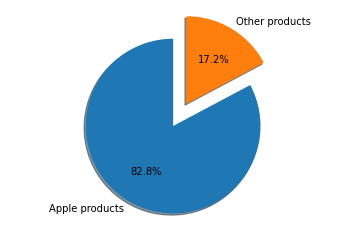

In [ ]:
# Pie
pie1 = pdf1["apple products"].value_counts()
pie1
labels="Apple products", "Other products"
explode=(0,0.3)

fig1, ax1 = plt.subplots()
ax1.pie(pie1, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("fig1.png")
plt.show()


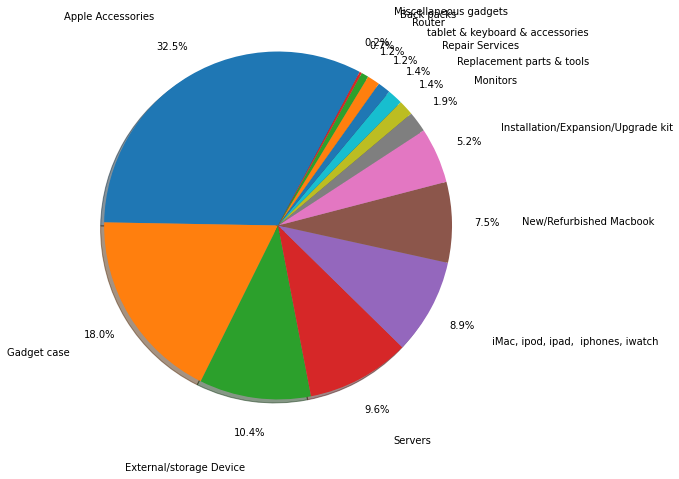

<Figure size 432x288 with 0 Axes>

In [ ]:
# Pie2
#labels2 = pdf1["category"]
pie2 = pdf1["category"].value_counts()
pie2
#explode2=(0,0, 0,0,0,0,0,1,0,0,0,0,0,0,0, 0)


fig2, ax2 = plt.subplots(figsize=(12, 8))
ax2.pie(pie2, labels=pie2.index, autopct='%1.1f%%', shadow=True, startangle=62, pctdistance=1.2, labeldistance=1.4)
plt.show()
plt.savefig('fig2.png')


2. 2nd pie with categories/ apple non-apple, count and ?

In [ ]:
pdf1.query('sku =="APP0662"')


,sku,name,desc,price,in_stock,type,category,apple products
583,APP0662,IMac AppleCare Protection Plan,Apple Care extended warranty for iMac.,179.0,1,1231,Apple Accessories,apple
